[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ooACuQR1szbxKso244j2UO-zDUungSMZ#scrollTo=I09zBXcloOr0)

# Problem 3

Use this notebook to write your code for problem 3.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

## Load data

In [2]:
import requests

url_dict = {
    'problem3data.txt': 'https://drive.google.com/uc?export=download&id=1DPF-C43F2JuWxtHvkTP99w5r9QNHxd70',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [3]:
train_file = 'problem3data.txt'
download_file(train_file)
train_data = genfromtxt(train_file, delimiter='\t')

y_train = train_data[:, 9]
X_train = train_data[:, :9]

Start downloading...
Complete


Text(0.5, 1.0, 'Number of exactly zero weights vs α for lasso regularization')

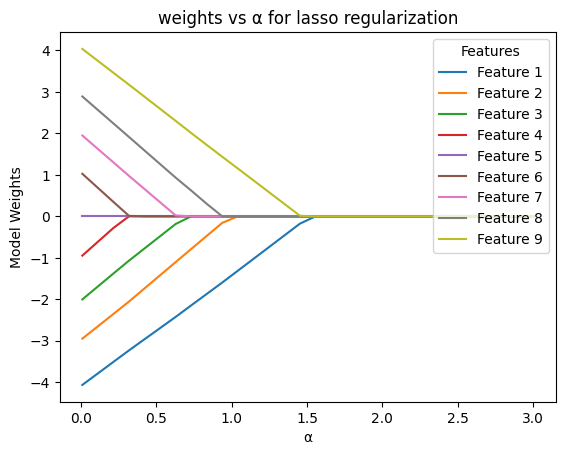

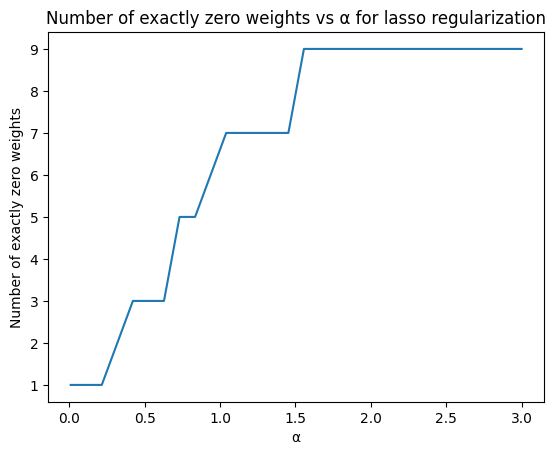

In [12]:
alphas = np.linspace(0.01, 3, 30)
all_weights = []
num_exactly_zero = []
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  weights = lasso.coef_
  all_weights.append(weights)
  num_exactly_zero.append(np.sum(weights == 0))


for j in range(X_train.shape[1]):  # Loop over each feature
    plt.plot(alphas, [w[j] for w in all_weights], label=f'Feature {j+1}')

plt.xlabel('α')
plt.ylabel('Model Weights')
plt.title('weights vs α for lasso regularization')
plt.legend(loc='upper right', title="Features")

plt.figure()
plt.plot(alphas, num_exactly_zero)
plt.xlabel('α')
plt.ylabel('Number of exactly zero weights')
plt.title('Number of exactly zero weights vs α for lasso regularization')


Text(0.5, 1.0, 'Number of exactly zero weights vs α for ridge regression')

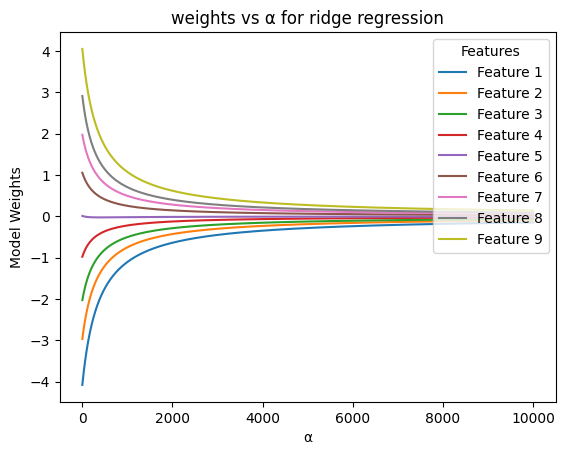

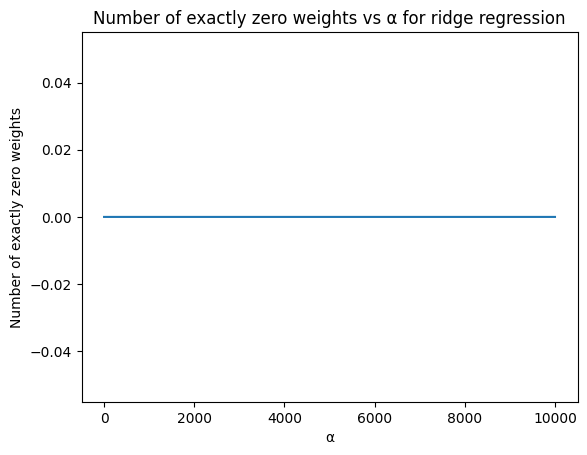

In [13]:
#alphas = np.linspace(0.01, 3, 30)
all_weights = []
alphas_ridge = range(1, 10**4 + 1)
ridge_zero = []
for i in range(1, 10**4 + 1):
  ridge = Ridge(alpha=i)
  ridge.fit(X_train, y_train)
  weights = ridge.coef_
  all_weights.append(weights)
  ridge_zero.append(np.sum(weights == 0))

for j in range(X_train.shape[1]):  # Loop over each feature
    plt.plot(alphas_ridge, [w[j] for w in all_weights], label=f'Feature {j+1}')

plt.xlabel('α')
plt.ylabel('Model Weights')
plt.title('weights vs α for ridge regression')
plt.legend(loc='upper right', title="Features")

plt.figure()
plt.plot(alphas_ridge, ridge_zero)
plt.xlabel('α')
plt.ylabel('Number of exactly zero weights')
plt.title('Number of exactly zero weights vs α for ridge regression')
